<img src="../assets/logo3.png" width="200" height="200" >

<div style="display:block"><br><br>
    <div style="display:block" align=left display=block> 
        <font size=5><b>Day8 - HandsOn (Solution) - Introduction to Neural Networks with Keras</b></font><br>
        <hr/>

</div>

<pre>
.
├── <b>Task:</b> Tensorflow Playground
│ 
├── <b>Task:</b> Building an Image classifier with Keras
│
├── <b>Task:</b> Regression with MLP
│
├── <b>Task:</b> Saving and Loading models
│
└── <b>Task:</b> Hyperparameter tuning
</pre>

<hr>

# <b>Task:</b> Tensorflow Playground

Visit Tensorflow Playground website using this [link](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.51598&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

TensorFlow Playground is an interactive web app that allows users to test artificial intelligence (AI) algorithms with Google's TensorFlow machine learning libraries. You can create MLPs and test them with different configurations on some predefined data. For example, you can experiment with number of layers, number of neurons in each layer, the data itself (Spiral, Circle, Gaussian, XOR) and ...

#### Your task:

- Using ***Gaussian*** data, apply 1 hidden layer and 1 neuron, then click on start to train the model. (Keep everything else constant)

... as you can see, the model can successfully draw a line between the blue and the orange class.

- Now change the data to ***Circle***. Can the model successfully draw a line between the 2 classes?

... as you can see, the data is not linearly seperable, so we cannot draw a line between the classes.

- Now only using one hidden layer and the same data, add neurons one by one and train the model. Can we successfully seperate the classes by adding neurons?

... as you can see, by adding neurons we can seperate the classes.

- Now apply your model on the ***Spiral*** data. Can you train the model to seperate the classes only using 1 hidden layer? Try adding more hidden layers until you can!

You can also change the ***Problem Type*** to ***Regression*** instead of ***Classification***, or play around with different ***Activation Functions*** like ***TanH***, ***Relu***, ***Linear***, and ...  


<hr>
<hr>
<hr>
<hr>
<hr>
<hr>

# Building an Image Classifier

Import libraries

In [11]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

Today we want to use the fashion MNIST dataset. `keras.datasets` has a number of popular datasets. Our data contains images, each 28x28 pixels. Each pixel intensity is represented as a byte (0 to 255). The labels are the class IDs, ranging from 0 to 9 (each representing a clothing class like T-shirt, Coat, ...). The dataset is already split to a training set and a test set. 

- Run the code below to obtain the dataset.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
X_train_full.shape

(60000, 28, 28)

<hr>

Now let's preprocess our data. We want to have a validation set as well as the test set.

- Split the training set into a validation set and a (smaller) training set 
- Scale the pixel intensities down to the 0-1 range and convert them to floats

In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

<hr>

The code below plots the first image in the training set (with a `'binary'`
 color map)
 - Run the code

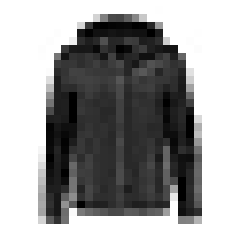

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

<hr>

The name of each class is as follows:

- Run the code

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

<hr>

- Plot a sample of the images in the dataset together with its labels similar to following image:

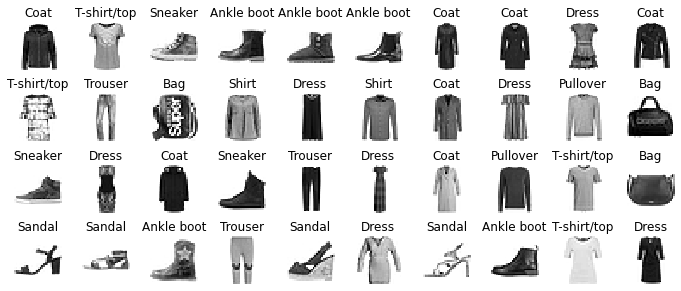

In [9]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

<hr>

- Run the code below to set the random seeds

In [12]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

As you can see in the following figure, perceptrons and activation functions can be used as building blocks of bigger networks to classify a dataset. For example in the following image, your network has a 3 dimentional input and two dense layers, one final layer and four outputs. The first Dense layer has three perceptrons and the second one has two. ***Dense layers are connected to all of their input and outputs***. 

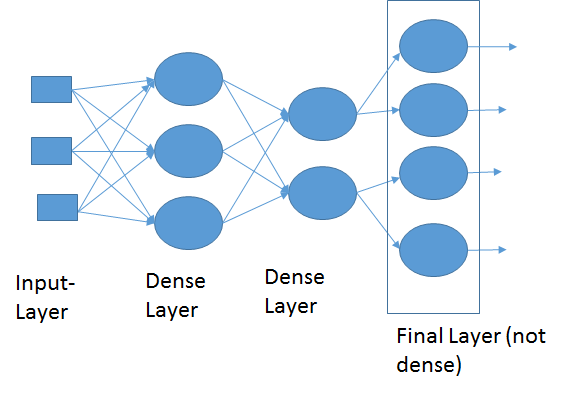

<hr>

- Build the following architecture to train on our dataset using ```keras```

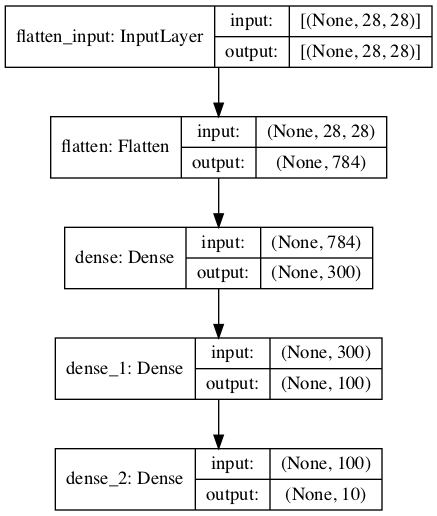

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

<hr>

- Print layers of a network using Keras commands



In [14]:
model.layers

<hr>

- Print model summary


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


- Print weights, biases and shape of each layer

In [16]:
hidden1 = model.layers[1]

In [17]:
weights, biases = hidden1.get_weights()

In [18]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape

(300,)

<hr>

- Compile the model using ```model.compile``` function. Use a ***sparse categorical crossentropy*** loss, ***SGD*** optimizer, and ***accuracy*** as the metric.

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

<hr>

Now the backbone of our model is ready and we can train it!

- Fit the model on the training data for 20 epochs. Also use the validation data we created.

In [23]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4353 - val_accuracy: 0.8526
Epoch 3/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4391 - accuracy: 0.8457 - val_loss: 0.5333 - val_accuracy: 0.7988
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4123 - accuracy: 0.8564 - val_loss: 0.3916 - val_accuracy: 0.8650
Epoch 5/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3939 - accuracy: 0.8616 - val_loss: 0.3741 - val_accuracy: 0.8698
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3751 - accuracy: 0.8678 - val_loss: 0.3706 - val_accuracy: 0.8726
Epoch 7/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3630 - accuracy: 0.8715 - val_loss: 0.3621 - val_accuracy

<hr>

Now we can access the training and validation loss, as well as accuracy (because we defined accuracy as a metric when compiling our model) by using ```history```

In [24]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 1719}

In [25]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
history.history['loss']

[0.7237029075622559,
 0.484192818403244,
 0.43905338644981384,
 0.41231462359428406,
 0.3939222991466522,
 0.3750678300857544,
 0.3630312979221344,
 0.35152509808540344,
 0.3412765860557556,
 0.3317754566669464,
 0.3238329291343689,
 0.3146835267543793,
 0.30778029561042786,
 0.30192798376083374,
 0.2943917214870453,
 0.28883519768714905,
 0.2835114002227783,
 0.27753812074661255,
 0.2725583016872406,
 0.26720917224884033]

<hr>

- Plot the ```history.history``` and interpret it. (Your plot should show loss, accuracy, val_loss, and val_accuracy in one figure just like the figure below:)

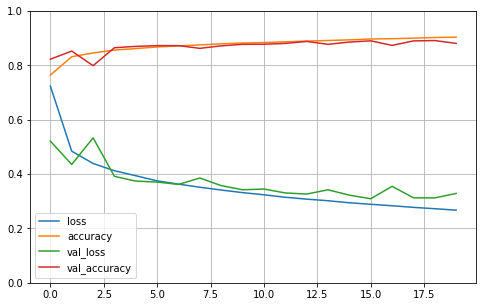

In [29]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

<hr>

- Now evaluate your model on the test dataset using ```model.evaluate``` and interprate the results.

In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3650 - accuracy: 0.8645


[0.364972859621048, 0.8644999861717224]

<hr>

Let's get 3 random images from the data and predict their label using your model.

- Run the code

In [31]:
X_new = X_test[:6]
y_proba = model.predict(X_new)

This is the prediction of our model:

In [32]:
y_pred = np.argmax(model.predict(X_new), axis=-1)

In [33]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser'],
      dtype='<U11')

This is the true label:

In [35]:
y_new = np.array(class_names)[y_test[:6]]
y_new

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser'],
      dtype='<U11')

<hr>

- Plot the images, true labels, and predictions of these 3 samples in one figure.

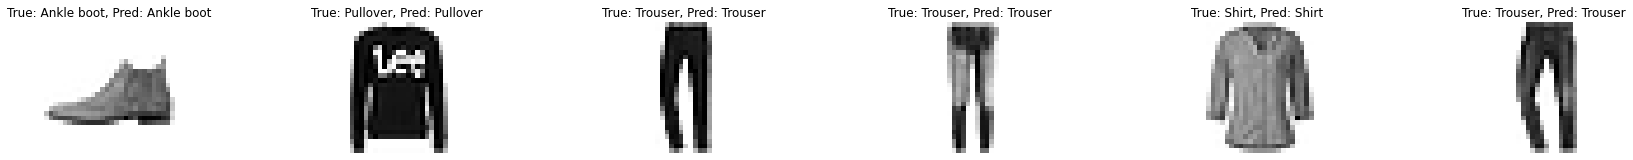

In [40]:
plt.figure(figsize=(30, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 6, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title('True: {}, Pred: {}'.format(class_names[y_test[index]], y_new[index]), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>


# <b>Task:</b> Regression *MLP*

In this section we are going to build a regression MLP that predicts house prices with `keras` using `California housing dataset `. 

In [41]:
# import libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
import keras
import matplotlib.pyplot as plt
import pandas as pd

<hr>

- Split the data into train, test and validation sets.

HINT: you can use `sklearn` for this part

In [42]:
#split
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [43]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

<hr>

Many machine learning algorithms work better when features are on a relatively similar scale and close to normally distributed.

- Normalize and scale the dataset with StandardScaler().

HINT: you can use sklearn for this part

In [44]:
# scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

Now that we have prepared the dataset, we are going to build and train a model with the following instructions:

*   First layer : a linear  layer with 30 neurons and relu as activation function
*   Second layer: a linear layer with one neuron and linear activation function



In [45]:
#model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1 )
])

<hr>

#### Train the model

In this part, we are going to first compile our model, then train it for **20** epochs.

When compiling the model, set the hyperparameters as below:
- Objective: mean_squared_error
- Optimizer : SGD
- Learning rate: 1e-3


In [46]:
#complile and fit the model
model.compile(loss="mean_squared_error", optimizer=tensorflow.keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.8376 - val_loss: 1.0720
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6953 - val_loss: 0.6397
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6373 - val_loss: 0.5960
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6050 - val_loss: 0.5744
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5785 - val_loss: 0.5613
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5558 - val_loss: 0.5296
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5369 - val_loss: 0.5063
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5214 - val_loss: 0.5133
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5074 - val_loss: 0.4940
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4956 - val_loss: 0.4764

<hr>

#### Evaluate the model

After training, we want to evaluate our model


*   Calculate loss for test data



In [47]:
mse_test = model.evaluate(X_test, y_test)
mse_test
X_new = X_test[:3]
X_new
y_pred = model.predict(X_new)
y_pred

162/162 [==============================] - 0s 1ms/step - loss: 0.4253


array([[0.7789994],
       [1.6928985],
       [3.3641841]], dtype=float32)


<hr>

*   Plot training and validation loss

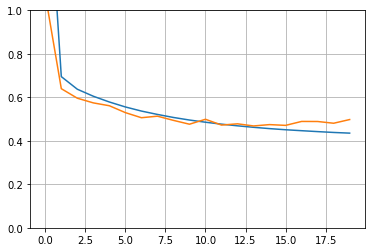

In [48]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

<hr>

*   Select three datapoints fom the test data and print the model prediction and true label for these datapoints.


In [ ]:
# Similar to last task

<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>

# Saving and Restoring

We can save our model after training and load it whenever we need it.

*   Save the model
*   Load the model
*   Select a test datapoint randomly and predict a sample from the test set with the loaded model.
*   Save only the model weights
*   Load only the model weights



In [49]:
# save the model
model.save("my_keras_model.h5")

In [50]:
# load the model
model = keras.models.load_model("my_keras_model.h5")

In [51]:
# prediction with loaded model
model.predict(X_new)

array([[0.7789994],
       [1.6928985],
       [3.3641841]], dtype=float32)

In [52]:
# save weights
model.save_weights("my_keras_weights.ckpt")

In [53]:
#load weights
model.load_weights("my_keras_weights.ckpt")

<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>

# Hyperparameter Tuning


Parameters which define the model architecture are referred to as hyperparameters and thus this process of searching for the ideal model architecture is referred to as hyperparameter tuning.

**NOTE**: hyperparameters are not model parameters and they cannot be directly trained from the data. 

Hyperparameter tuning methods:
- **Grid search**: the most basic hyperparameter tuning method. With this technique, we simply build a model for each possible combination of all of the hyperparameter values provided, evaluating each model, and selecting the architecture which produces the best results.

- **Random search**: Random search differs from grid search in that we longer provide a discrete set of values to explore for each hyperparameter; rather, we provide a statistical distribution for each hyperparameter from which values may be randomly sampled.

<p align="center">
<img width=70% src="https://www.jeremyjordan.me/content/images/2017/11/grid_vs_random.png" />
</p>

In [54]:
# Clearing the session
# useful when you're creating multiple models in succession, such as during hyperparameter search or cross-validation.
keras.backend.clear_session()
np.random.seed(42)

Define a function for building model. In the function, the model should be created and compiled and the ready to be trained model should be returned. We use the same data as the Regression Task, ```california housing```. So you can use the X_train, y_train, X_val, y_val you already have.

This function take following inputs:
- `n_hidden`: number of hidden layers
- `n_neurons`: number of neurons in each hidden layer
- `learning_rate`

**NOTE**: Use `ReLu` activation function for all layers except output layer.

**NOTE**: Use `SGD` optimizer and `MSE` loss.

In [59]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=[8]))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = tensorflow.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

Define hyperparameters value ranges:
- `n_hidden`: 1-2-3-4
- `n_neurons`: 50-60-70-80-90-100
- `learning_rate`: 3e-4, ..., 3e-2

In [60]:
param_distribs = {
    "n_hidden": np.arange(1, 4).tolist(),
    "n_neurons": np.arange(50, 100, 10).tolist(),
    "learning_rate": np.linspace(3e-4, 3e-2, 50).tolist()
}

<hr>

- Use `RandomizedSearchCV` class in sklearn for randomized hyperparameter tunning. 

**NOTE**: Set `n_iter`=10 and `cv`=3 for `RandomizedSearchCV`. fit each model for 25 `epoch` and `early stopping` by `patience` equals to 5.

**HINT**: CrossValidation a robust estimate of the performance of a model on unseen data. It does this by splitting the training dataset into k subsets, taking turns training models on all subsets except one, which is held out, and evaluating model performance on the held-out validation dataset. The process is repeated until all subsets are given an opportunity to be the held-out validation set. The performance measure is then averaged across all models that are created.

**HINT**: EarlyStopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset. [link](https://keras.io/api/callbacks/early_stopping/)

**NOTE**: Executing hyperparameter tuning take long time (~10min)

In [62]:
from sklearn.model_selection import RandomizedSearchCV

# this line wrap keras model to be compatiable with sklearn library
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=2, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=10,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.


242/242 [==============================] - 2s 4ms/step - loss: 1.4538 - val_loss: 10.2944
Epoch 2/10
242/242 [==============================] - 1s 4ms/step - loss: 0.6891 - val_loss: 1.6262
Epoch 3/10
242/242 [==============================] - 1s 4ms/step - loss: 0.5109 - val_loss: 0.7168
Epoch 4/10
242/242 [==============================] - 1s 4ms/step - loss: 0.4620 - val_loss: 0.5296
Epoch 5/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4350 - val_loss: 0.4582
Epoch 6/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4167 - val_loss: 0.4495
Epoch 7/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4045 - val_loss: 0.4265
Epoch 8/10
242/242 [==============================] - 1s 2ms/step - loss: 0.3943 - val_loss: 0.4267
Epoch 9/10
242/242 [==============================] - 1s 2ms/step - loss: 0.3866 - val_loss: 0.4234
Epoch 10/10
121/121 [==============================] - 0s 1ms/step - loss: 0.3920
Epoch 1/10
242/242 [========

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fa0b1cf7f90>,
                   n_iter=2,
                   param_distributions={'learning_rate': [0.0003,
                                                          0.0009061224489795917,
                                                          0.0015122448979591834,
                                                          0.0021183673469387754,
                                                          0.002724489795918367,
                                                          0.003330612244897959,
                                                          0.003936734693877551,
                                                          0.004542857142857142,
                                                          0.005148979591836734,
                                                          0.005755102040816326,
                                                         

<hr>

- What is the best model's params ?!

In [63]:
rnd_search_cv.best_params_

{'n_neurons': 50, 'n_hidden': 3, 'learning_rate': 0.02818163265306122}

<hr>

- What is the best score the model can obtain ?!

In [64]:
rnd_search_cv.best_score_

-0.32173238197962445

<hr>

- Get best model and evaluate it with test data

In [65]:
model = rnd_search_cv.best_estimator_.model
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3395


0.33952075242996216

<hr>
<hr>
<hr>
<hr>
<hr>
<hr>

# Good Luck :) 
